In [2]:
# 1. demographic filtering(인구통계학적 필터링) - 흥행
# 2. content Based filtering(컨텐츠 기반 필터링) - 줄거리/배우
# 3. collabortive filtering(협업필터링) - 리뷰


# 데이터 다운로드(캐글) tmdb_5000으로 검색해서 가장 vote수가 높은 
# 자료를 참고함 


## 1. Demographic Filtering   
## (인구통계학적 필터링)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv('data/tmdb_5000_credits.csv')
df2 = pd.read_csv('data/tmdb_5000_movies.csv')

In [5]:
df1.head()
# df1.columns

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df2.head()
df2.columns
print(df2.shape)
df2.info()

(4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status    

In [7]:
# title이라는 동일한 컬럼명이 있는데 df1의 title과 df2의 title이 같은지 비교 

df1['title'].equals(df2['title'])   # True


True

In [8]:
# 데이터 합치기 
df1.columns
df1.columns = ['id', 'title', 'cast', 'crew']

In [9]:
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [10]:
df1[['id','cast','crew']]

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [11]:
# 데이터 합치기 
# df2에 id를 기준으로 df1의 컬럼을 합칠건데
# title은 중복됨으로 빼고 삽입한다. merge사용

df2 = df2.merge(df1[['id','cast','crew']], on='id')

In [12]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [13]:
# 대중들이 모두 좋아하는 영화 찾아보기 
# 평점도 높고 평점도 많아야 함(vote_average, vote_count)

# 영화 1 - 평점 10/10 평가자 10명 
# 영화 2 - 평점 8/10 평가자 500명 
# 2번에 더 정확한 평가라고 볼 수 있다. 

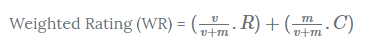

In [14]:
# v is the number of votes for the movie; 평점갯수
# m is the minimum votes required to be listed in the chart; 최소로 필요한 갯수
# R is the average rating of the movie; And 영화의 평균평점 
# C is the mean vote across the whole report 전체 평균평점

# 현재 v와 r은 값이 있는 상태 

In [15]:
C = df2['vote_average'].mean() 
round(C,2)  #전체 영화 평균평점 6.09

6.09

In [16]:
M = df2['vote_count'].quantile(0.9)     #상위 10%의 평균 평점갯수 
M   # 1838.4    흠 얘는 quantile함수의 인수에 따라서 바뀔수있겠군 

1838.4000000000015

In [17]:
q_movies = df2.copy().loc[df2['vote_count']>= M]
q_movies.shape

# 상위 10퍼센트만의 데이터를 추출한 이유는 인구통계학적 필터링을 하기위함이다.

(481, 22)

In [18]:
q_movies['vote_count'].sort_values(ascending=False)

96      13752
65      12002
0       11800
16      11776
788     10995
        ...  
1405     1864
597      1862
2454     1859
195      1851
2585     1840
Name: vote_count, Length: 481, dtype: int64

In [19]:
# M = df2['vote_count'].quantile(0.9)     #상위 10%의 평균 평점갯수
# C = df2['vote_average'].mean()  #전체 영화 평균평점

In [20]:
# 위 공식을 적용하자 
# 공식에 대입하는 함수 정의 

def weighted_rating(x, M=M, C=C):
    V = x['vote_count']
    R = x['vote_average']
    return (V/(V+M) * R) + (M/(M+V) * C)

In [21]:
q_movies['score'] = q_movies.apply(weighted_rating, axis = 1)
# apply 함수 
# q_movies의 모든 행(axis=1로해야 열방향으로 진행함)에 위에 정의한 weighted_rating 함수를 대입해서 
# 나온 결과를 score열에 저장 

In [22]:
q_movies.head(3)
# popularity는 무엇? 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [23]:
q_movies = q_movies[['title','vote_count','vote_average','score']].sort_values(by='score',ascending=False)
q_movies.head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


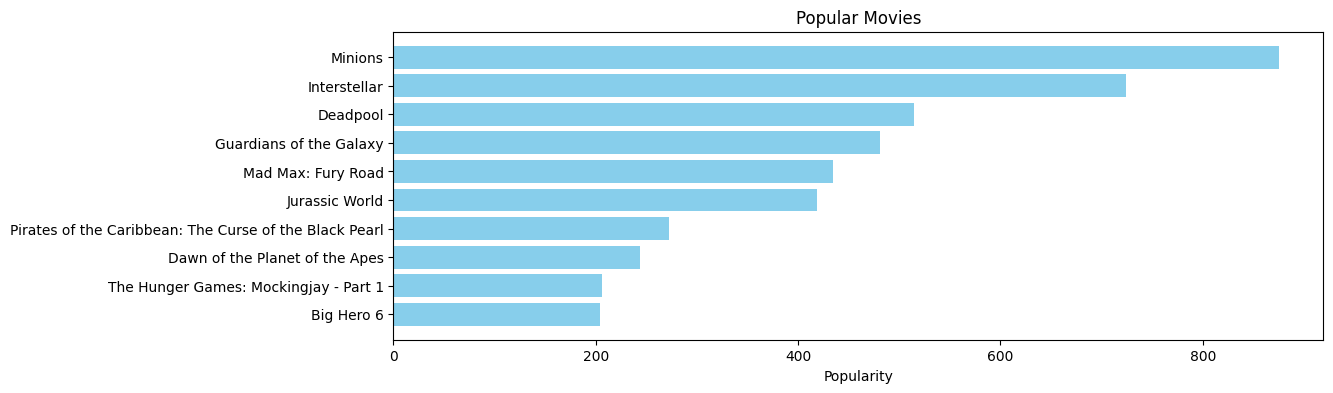

Text(0.5, 1.0, 'Popular Movies')

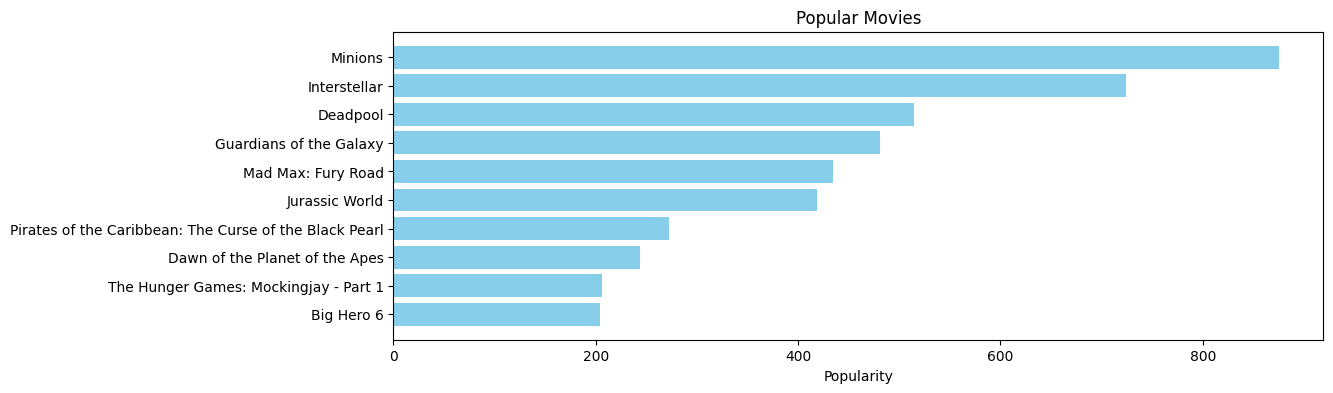

In [24]:
# popularity는 데이터에서 제공된 컬럼 
pop= df2.sort_values('popularity', ascending=False)
# print(pop.head(5))


import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# 앞에서 구했던 평점 순위와는 다른 모습 
# 평점 카운트 평점도 참고는 하지만 그것보다는 일단위로 누적되는(변하는데이터)
# 데이터로 산정한다고 한다.(구글링)
# 조회수, 즐겨찾기, 워치리스트에 추가, 시청수 등으로 산정함 

## 2. Content Based Filtering   
## 컨텐츠 기반 필터링

In [25]:
# 유사한 영화를 추천해주는 필터링 
# 줄거리 텍스트를 분석

In [26]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [27]:
# 텍스트 분석 -> 벡터화 하기 
# Bag Of Words - BOW 

# I am a boy
# I am a girl 

# I(2), am(2), a(2), boy(1), girl(1)

# 각각의 단어가 몇번씩 나왔는지 확인
# 각각의 단어를 컬럼으로 두고 

#         I   am  a   boy girl
# 문장1   1   1   1   1    0    (1,1,1,1,0)
# 문장2   1   1   1   0    1    (1,1,1,0,1)

# 각 문자가 나온 횟수를 매트릭스화 하는 것 --> 피쳐 벡터화 
# 카운트가 높은 단어가 중요하다고 인식됨 

# 문서 100개 모든 단어수 1만개 일 때 
# 100 * 10,000 = 1,000,000의 데이터 

#         단어1, 단어2, 단어3, 단어4 ..... 단어1만 
# 문서1 
# 문서2
# 문서3
# ...
# 문서100        


# 1. TfidVectorizer(TF-IDF 기반의 벡터화)
# TF-IDF : 문서집합에서 한 단어가 얼마나 중요한지를 수치적으로 나타낸 가중치
# a나 the 이런건 중요하지 않음(페널티적용)

# 2. CountVectorizer(다 세는거)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
# 영어에서 크게 의미 없는 단어들은 빼준다
# 관사나 전치사,접속사 같은것들 

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS
# 걸러줄 단어들 확인 가능 

In [30]:
# overview에 null값을 채워준다.

df2['overview'].isnull().values.any()   #하나라도 결측치가 있는지 확인
df2['overview'].isnull().sum()  # 이걸로해도될듯


3

In [31]:
df2['overview'] = df2['overview'].fillna('')

In [32]:
df2['overview'].isnull().sum()

0

In [33]:
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [34]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 125840 stored elements and shape (4803, 20978)>

In [35]:
# 단어 유사도 확인(코사인)
# 정규환된 벡터가 있으니 두 벡터의 내적을 통해서 코사인유사도를 구할 수 있다. 

# linear_kernel # 얘가 더 빠름 


In [36]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)   #x와 y
cosine_sim.shape


(4803, 4803)

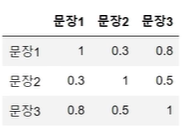

In [38]:
# 인덱스 구하기 함수 
# 영화 제목을 입력하면 인덱스가 몇번인지 알아오기 
# 시리즈를 만들건데 인덱스를 영화제목으로하고 값을 인덱스번호로 준다

indices = pd.Series(df2.index, index = df2['title']).drop_duplicates()
indices


title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [41]:
indices['Avatar']
indices['Spectre']

2

In [44]:
df2.iloc[[2]]
# 제목으로 얻어온 인덱스번호를 iloc에 대입하면 모든 정보를 확인할 수 있다. 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:
# 영화의 제목을 입력받으면 코사인 유사도를 통해서 가장 유사도가 높은 
# 상위 10개의 다른영화를 반환하는 함수 

def get_recommendations(title,cosine_sim=cosine_sim):
    # 영화제목을 통해서 전체데이터 기준 그 영화의 index값을 얻기
    idx = indices[title]
    # 코사인 유사도 매트릭스(cosine_sim)에서 
    # idx에 해당하는 데이터를 (idx,유사도) 형태로 얻기 
    sim_cosine = list(enumerate(cosine_sim[3]))
    # 가장 유사도가 큰 것부터 내림차순으로 정렬하기 
    

In [45]:
# 하나씩 뜯어보기 

# indices를 통해서 타이틀을 넣고 정보 얻어오기 

test_idx = indices['The Dark Knight Rises'] # 영화제목을 통해서 전체데이터 기준 그 영화의 index값을 얻기
test_idx

3

In [46]:
cosine_sim[3]

array([0.02499512, 0.        , 0.        , ..., 0.03386366, 0.04275232,
       0.02269198])

In [57]:
# enumerate

test_sim_cosine = list(enumerate(cosine_sim[3]))
# 코사인 유사도 매트릭스(cosine_sim)에서 
# idx에 해당하는 데이터를 (idx,유사도) 형태로 얻기 

In [59]:
# 정렬하기 

test_sim_score = sorted(test_sim_cosine, key = lambda x : x[1], reverse = True)
# reverse = True -> 내림차순

test_sim_score[1:11]    # 정렬한 데이터 중 자기자신(0번째)을 제외한 10개 추출



[(65, 0.3015117659166547),
 (299, 0.2985704525539681),
 (428, 0.2878505467001693),
 (1359, 0.26446092382799496),
 (3854, 0.1854500300656145),
 (119, 0.167996261998507),
 (2507, 0.1668289104335827),
 (9, 0.13374009066555226),
 (1181, 0.1321970213847681),
 (210, 0.13045537014449815)]